# Predicting Car Prices
___
## Project Objectives
- practice machine learning workflow
- predict a car's market price using its attributes and KNN

## About the Data
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

Note: Several of the attributes in the database could be used as a "class" attribute.


### Attribute Information:
1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

In [1]:
# setup environment
import pandas as pd
import numpy as np
pd.set_option('max_columns', 99)

In [2]:
cars = pd.read_csv('imports-85.data')
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [3]:
# the raw data contained no column names
# need to make revisions to the imported dataframe
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
           'num_doors', 'body_style', 'drive_wheels', 'engine_location',
           'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
           'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', header=None, names=columns)
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
# notice that 'normalized_losses' contain data that may need cleansing
print(cars['normalized_losses'].value_counts())

# further data inspection
print(cars.shape)
print(cars.describe())

# check if any null values within dataframe
print(cars.isnull().values.any())

?      41
161    11
91      8
150     7
128     6
104     6
134     6
168     5
103     5
65      5
95      5
102     5
85      5
74      5
94      5
93      4
118     4
122     4
148     4
106     4
115     3
154     3
83      3
137     3
125     3
101     3
89      2
188     2
113     2
129     2
145     2
119     2
197     2
108     2
87      2
153     2
164     2
158     2
110     2
192     2
194     2
81      2
98      1
90      1
256     1
121     1
107     1
231     1
77      1
186     1
142     1
78      1
Name: normalized_losses, dtype: int64
(205, 26)
        symboling  wheel_base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000 

## Observations
We can potentially separate the 26 columns of data into 2 categories: numerical and categorical

18 Numericals:
- symboling
- normalized_losses
- num_doors (need to transform data)
- wheel_base
- length
- width
- height
- curb_weight
- num_cylinders (need to transform data)
- engine_size
- bore
- stroke
- compression_ratio
- horsepower
- peak_rpm
- city_mpg
- highway_mpg
- price

8 Categorials:
- make
- fuel_type
- aspiration
- body_style
- drive_wheels
- engine_location
- engine_type
- fuel_system

In [5]:
# check the composition of the categorial columns
cat_cols = ['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
            'engine_location', 'engine_type', 'fuel_system']

for col in cat_cols:
    print(cars[col].value_counts())

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64
gas       185
diesel     20
Name: fuel_type, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64
front    202
rear       3
Name: engine_location, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine_type, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi

## Observations
1. Two of the data columns (`num_doors` and `num_cylinders`) should be numerical data, but are currently recorded in strings using words.

2. Some of the data are recorded as '?', notable in `normalized_losses`, these data should be replaced with `np.nan`.

In [6]:
# convert 'num_doors' to numericals
cars['num_doors'] = cars['num_doors'].replace('two', 2)
cars['num_doors'] = cars['num_doors'].replace('four', 4)
cars['num_doors'].value_counts()

4    114
2     89
?      2
Name: num_doors, dtype: int64

In [7]:
# convert 'num_cylinders' to numericals
cars['num_cylinders'] = cars['num_cylinders'].replace('four', 4)
cars['num_cylinders'] = cars['num_cylinders'].replace('six', 6)
cars['num_cylinders'] = cars['num_cylinders'].replace('five', 5)
cars['num_cylinders'] = cars['num_cylinders'].replace('eight', 8)
cars['num_cylinders'] = cars['num_cylinders'].replace('two', 2)
cars['num_cylinders'] = cars['num_cylinders'].replace('twelve', 12)
cars['num_cylinders'] = cars['num_cylinders'].replace('three', 3)
print(cars['num_cylinders'].value_counts())

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_cylinders, dtype: int64


In [8]:
# double check other numerical columns for data with '?'
num_cols = ['symboling', 'num_doors', 'wheel_base', 'length', 'width', 'height',
 'curb_weight', 'num_cylinders', 'engine_size', 'bore', 'stroke', 
 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
 'price', 'normalized_losses']

for col in num_cols:
    try:
        count_missing = (cars[col] == '?').sum()
        print('{}: {}'.format(col, count_missing))
    except:
        pass

num_doors: 2
bore: 4
stroke: 4
horsepower: 2
peak_rpm: 2
price: 4
normalized_losses: 41


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


In [9]:
# replace the '?' with np.nan
for col in ['num_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price',
            'normalized_losses']:
    cars[col] = cars[col].replace('?', np.nan)

In [10]:
# convert all the numerical column to float datatype
for col in num_cols:
    cars[col] = cars[col].astype(float)

In [11]:
# check the number of instances with missing data
cars.isnull().apply(pd.Series.value_counts)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
False,205.0,164,205.0,205.0,205.0,203,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,201,201,205.0,203,203,205.0,205.0,201
True,NaN,41,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,2,2,NaN,NaN,4


## Observations
The above table showed the tabulation of missing data. Now, we need to determine on how we should deal with them.

There are 4 instances missing in `price`. And since `price` is the target attribute for this project, missing data is not helpful at all. Thus, these rows should be removed entirely.

And since there are only 2 to 4 rows with missing data for `num_doors`, `bore`, `stroke`, `horsepower`, and `peak_rpm`, the impact out of the total 205 rows of data should be minimal. Thus, we will drop those rows as well.

Lastly, there are quite a number of rows with missing data in `normalized_losses`. If we drop those rows, the data size would be reduced significantly, thus we should not do so. Instead, we will replace those missing data with the average values from that column.

In [12]:
# drop the 4 rows that have no data in 'price'
cars = cars.dropna(axis = 0, subset=['num_doors', 'bore', 'stroke', 'horsepower',
                                     'peak_rpm', 'price'])
cars.isnull().apply(pd.Series.value_counts)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
False,193.0,159,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0,193.0
True,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# replace the missing data in 'normalized_losses' with the average value
temp_mean = cars['normalized_losses'].mean()
idx = cars[cars['normalized_losses'].isnull() == True].index.tolist()
cars.ix[idx, 'normalized_losses'] = temp_mean

cars.isnull().apply(pd.Series.value_counts)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
False,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193


## Observations
We have now dealt with the missing data.
However, for simplicity, let us normalize all the numerical data within their respective columns.

In [14]:
# perform rescaling
normal_cols = ['symboling', 'num_doors', 'wheel_base', 'length', 'width', 'height',
 'curb_weight', 'num_cylinders', 'engine_size', 'bore', 'stroke', 
 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
 'normalized_losses']

for col in normal_cols:
    cars[col] = (cars[col] - min(cars[col])) / (max(cars[col]) - min(cars[col]))

In [15]:
# inspect rescaled data
cars[num_cols].describe()

,symboling,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,normalized_losses
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.559585,0.580311,0.359295,0.495917,0.478101,0.505829,0.416411,0.157743,0.253299,0.564730,0.561362,0.196477,0.259261,0.387649,0.342401,0.389146,13285.025907,0.293885
std,0.247116,0.494792,0.179371,0.186248,0.182718,0.199564,0.204306,0.113687,0.156945,0.194560,0.150200,0.248593,0.177384,0.191304,0.177440,0.179392,8089.082886,0.169324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000,0.000000
25%,0.400000,0.000000,0.230321,0.376119,0.324786,0.350000,0.254849,0.111111,0.139623,0.435714,0.495238,0.093750,0.102804,0.265306,0.166667,0.236842,7738.000000,0.157068
50%,0.600000,1.000000,0.303207,0.479104,0.435897,0.525000,0.359193,0.111111,0.222642,0.550000,0.580952,0.125000,0.219626,0.387755,0.333333,0.368421,10245.000000,0.293885
75%,0.800000,1.000000,0.460641,0.649254,0.564103,0.658333,0.567882,0.111111,0.320755,0.750000,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16515.000000,0.361257
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000,1.000000


___
## Building the Predictive Model with KNN
### Univariate KNN Model
We will start off the KNN modeling with simple univariate models.

In [16]:
# create a function that takes in 3 parameters:
# 1. name of the training column
# 2. name of the target column
# 3. the dataframe object

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

def knn_train_test(train, target, df):
    # setup hyperparameters
    # 10 folds with 5-nearest neighbors
    n_fold = 10
    k_value = 5
    
    # fit the knn model
    kf = KFold(n_splits = n_fold, shuffle = True, random_state = 1)
    knn = KNeighborsRegressor(n_neighbors = k_value, algorithm = 'auto')
    
    # calculate the MSE/RMSE
    mses = cross_val_score(knn, df[[train]], df[[target]],
                           scoring = 'neg_mean_squared_error',                           
                           cv = kf)
    rmses = abs(mses) ** (1/2)
    return rmses.mean()

In [17]:
# iterate over all the normalized numerical attributes
# compare which attributes perform better

outcomes_dict = {}
for i in normal_cols:
    rmse = knn_train_test(i, 'price', cars)
    outcomes_dict[i] = rmse

outcomes = pd.Series(outcomes_dict)
outcomes.sort_values(inplace = True)
outcomes

engine_size          3045.570083
horsepower           3802.172987
city_mpg             3860.822934
curb_weight          4304.217752
width                4322.542007
highway_mpg          4372.894213
length               5100.594790
wheel_base           5698.985511
normalized_losses    6523.369298
compression_ratio    6543.846638
peak_rpm             7211.208464
stroke               7349.805222
bore                 7389.983931
height               7579.708864
symboling            7785.708377
num_doors            8318.980907
num_cylinders        8600.179616
dtype: float64

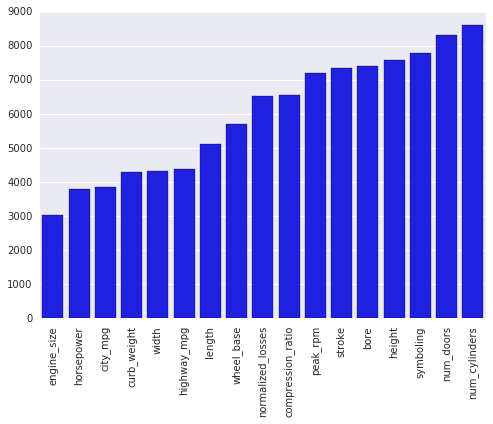

In [18]:
# visualize the outcomes

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.despine()

g = sns.barplot(outcomes.index, outcomes, color='blue')
g.set_xticklabels(outcomes.index, rotation=90)

### Observations
Under the conditions:
- 10 folds
- 5-nearest neighbors

Using RMSE as their predictive power, we can separate the normalized numerical attributes into 4 tiers:

- Tier 1: `engine_size`
- Tier 2: `horsepower` and `city_mpg`
- Tier 3: `curb_weight`, `width`, and `highway_mpg`
- Tier 4: all otheres
___

But what if we alter the k-nearest parameter away from the default (5)?
Let us augment the previously defined function with an additional parameter: k

In [19]:
# refine the knn_train_test function with an additional parameter: k

def knn_train_test_with_k(train, target, df, k):
    # setup hyperparameters
    # 10 folds with k-nearest neighbors
    n_fold = 10
    k_value = k
    
    # fit the knn model
    kf = KFold(n_splits = n_fold, shuffle = True, random_state = 1)
    knn = KNeighborsRegressor(n_neighbors = k_value, algorithm = 'auto')
    
    # calculate the MSE/RMSE
    mses = cross_val_score(knn, df[[train]], df[[target]],
                           scoring = 'neg_mean_squared_error',                           
                           cv = kf)
    rmses = abs(mses) ** (1/2)
    return rmses.mean()

In [37]:
# iterate over all the normalized numerical attributes
# compare which attributes perform better

k_outcomes_dict = {}
for i in normal_cols:
    k_dict = {}
    for k in [1,3,5,7,9]:
        rmse = knn_train_test_with_k(i, 'price', cars, k)
        k_dict[k] = rmse
    k_outcomes_dict[i] = k_dict
    
k_outcomes_dict

{'bore': {1: 7735.8258650444013,
  3: 7279.9722270218463,
  5: 7389.9839313728935,
  7: 7209.6348664409716,
  9: 7112.5810562868428},
 'city_mpg': {1: 5231.5372014570912,
  3: 4054.9964813756123,
  5: 3860.8229341256388,
  7: 3783.5879741427343,
  9: 4019.2716325628608},
 'compression_ratio': {1: 6598.6296987954311,
  3: 6134.2264607841125,
  5: 6543.8466376551842,
  7: 6496.4173390074211,
  9: 6446.426660173478},
 'curb_weight': {1: 5148.9621203240076,
  3: 4470.8247112251429,
  5: 4304.2177521578278,
  7: 4089.1308741486077,
  9: 4002.7177768846095},
 'engine_size': {1: 3852.9355579362782,
  3: 2979.0616649791327,
  5: 3045.5700825685044,
  7: 3292.0863186157048,
  9: 3435.1839018474589},
 'height': {1: 9912.4861396896849,
  3: 8187.603196125232,
  5: 7579.7088639466747,
  7: 7439.488871803539,
  9: 7409.4144933023463},
 'highway_mpg': {1: 5087.5836071581016,
  3: 4624.5405563862414,
  5: 4372.8942125997582,
  7: 4176.257434463796,
  9: 4168.3073195617926},
 'horsepower': {1: 3953.63

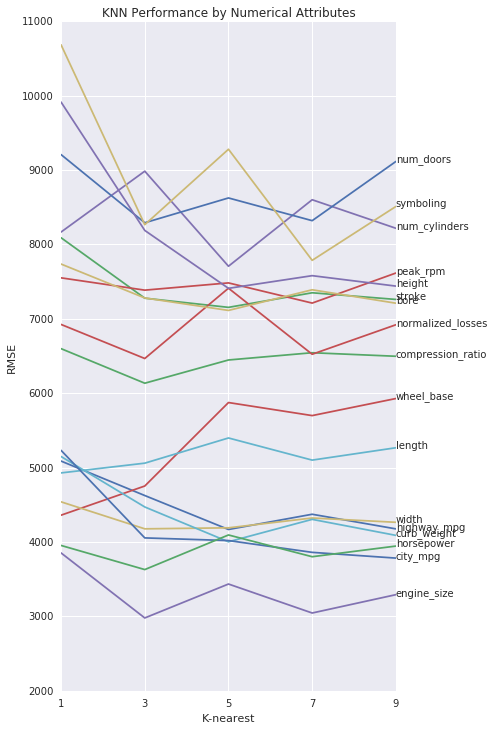

In [117]:
fig,ax = plt.subplots(figsize = (6,12))
for key, value in k_outcomes_dict.items():
    x = sorted(list(value.keys()))
    y = list(value.values())
    ax.plot(x,y)
    ax.annotate(str(key), xy = (9,y[4]), xycoords = 'data')
plt.xticks([1,3,5,7,9])
plt.title('KNN Performance by Numerical Attributes')
plt.xlabel('K-nearest')
plt.ylabel('RMSE')

### Observations
By visualizing the hyperparameter - k, it is shown that the performance of the univariate model improves as the k increases up to the point where k=7 for most of the attributes. However, the performance degrades when k increases to 9.

___
### Multivariate KNN Model
Let us further refine the KNN model by accounting for multiple attributes.

In [118]:
# refine the knn_train_test_with_k function to include multiple attributes

def knn_train_test_with_k_m(train, target, df, k):
    # setup hyperparameters
    # 10 folds with k-nearest neighbors
    n_fold = 10
    k_value = k
    
    # fit the knn model
    kf = KFold(n_splits = n_fold, shuffle = True, random_state = 1)
    knn = KNeighborsRegressor(n_neighbors = k_value, algorithm = 'auto')
    
    # calculate the MSE/RMSE
    mses = cross_val_score(knn, df[train], df[[target]],
                           scoring = 'neg_mean_squared_error',                           
                           cv = kf)
    rmses = abs(mses) ** (1/2)
    return rmses.mean()

In [126]:
# to start off, use k=5
# under the univariate model where k=5, the top attributes (in order) are:
# engine_size, horsepower, city_mpg, curb_weight, highway_mpg

top2_attributes = ['engine_size', 'horsepower']
top3_attributes = ['engine_size', 'horsepower', 'city_mpg']
top4_attributes = ['engine_size', 'horsepower', 'city_mpg', 'curb_weight']
top5_attributes = ['engine_size', 'horsepower', 'city_mpg', 'curb_weight',
                   'highway_mpg']

rmse_top2 = knn_train_test_with_k_m(top2_attributes, 'price', cars, 5)
rmse_top3 = knn_train_test_with_k_m(top3_attributes, 'price', cars, 5)
rmse_top4 = knn_train_test_with_k_m(top4_attributes, 'price', cars, 5)
rmse_top5 = knn_train_test_with_k_m(top5_attributes, 'price', cars, 5)

print('rmse_top2: {}'.format(rmse_top2))
print('rmse_top3: {}'.format(rmse_top3))
print('rmse_top4: {}'.format(rmse_top4))
print('rmse_top5: {}'.format(rmse_top5))

rmse_top2: 2774.4011163424016
rmse_top3: 2817.072099415039
rmse_top4: 3098.0546958840528
rmse_top5: 3176.8224993525596


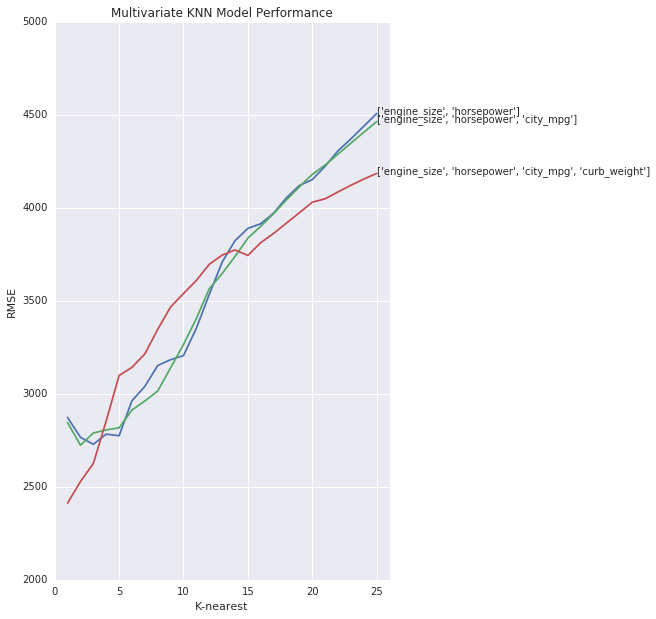

In [148]:
# select the top 3 performing models: top2, top3, top4 and
# tune the hyperparameter k from 1 to 25
# check which combinations works best

fig,ax = plt.subplots(figsize=(6,10))
for each in [top2_attributes, top3_attributes, top4_attributes]:
    top_rmses = []
    for i in range(1,26):
        rmse = knn_train_test_with_k_m(each, 'price', cars, i)
        top_rmses.append(rmse)
    ax.plot(range(1,26), top_rmses)
    ax.annotate(str(each), xy=(25,top_rmses[24]))
    plt.xlim(0,26)
    plt.ylim(2000,5000)

plt.title('Multivariate KNN Model Performance')
plt.xlabel('K-nearest')
plt.ylabel('RMSE')

### Observations
The model that uses 4 attributes performed the best overall, having the lowest RMSEs when k <= 3 and k >= 15.

When 4 <= k <= 14, either the model using 3 attributes or the one using 2 attributes performs the best.

However, generally speaking, the performance of the models degrade as k increases.

## Conclusion
According to this investigation, an univariate model has a performance (RMSE) threshold of approximately 3000.

The performance can be improved by moving to multivariate models. Under such models, the peak performance can be reached by using the top 4 attributes - `engine_size`, `horsepower`, `city_mpg`, and `curb_weight` and with a hyperparameter of k=1. Under these conditions, the RMSE is approximately 2400.